In [2]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
import os
for dirname, _, filenames in os.walk('E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset\Bike\Bike (1).jpeg
E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset\Bike\Bike (1).jpg
E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset\Bike\Bike (1).png
E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset\Bike\Bike (10).jpeg
E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset\Bike\Bike (10).jpg
E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset\Bike\Bike (10).png
E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset\Bike\Bike (100).jpeg
E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset\Bike\Bike (100).jpg
E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas C

In [4]:
data_path='E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Tugas Classifikasi Mobil dan Motor\Car-Bike-Dataset'

class_name=sorted(os.listdir(data_path))
class_name

['Bike', 'Car']

In [5]:
n_classes = len(class_name)
print(f"Total Number of Classes : {n_classes}")

Total Number of Classes : 2


In [6]:
class_dis = [len(os.listdir(os.path.join(data_path, name))) for name in class_name]
class_dis

[2000, 2000]

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# generators
# Initialize Generator
gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True, 
    rotation_range=20,
    validation_split=0.2
)

train_ds=gen.flow_from_directory(
    data_path,
    class_mode='binary',
    shuffle=True,
    batch_size=32,
    target_size=(256,256),
    subset="training"
)

validation_ds=gen.flow_from_directory(
    data_path,
    class_mode='binary',
    shuffle=True,
    batch_size=32,
    target_size=(256,256),
    subset="validation"
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [8]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

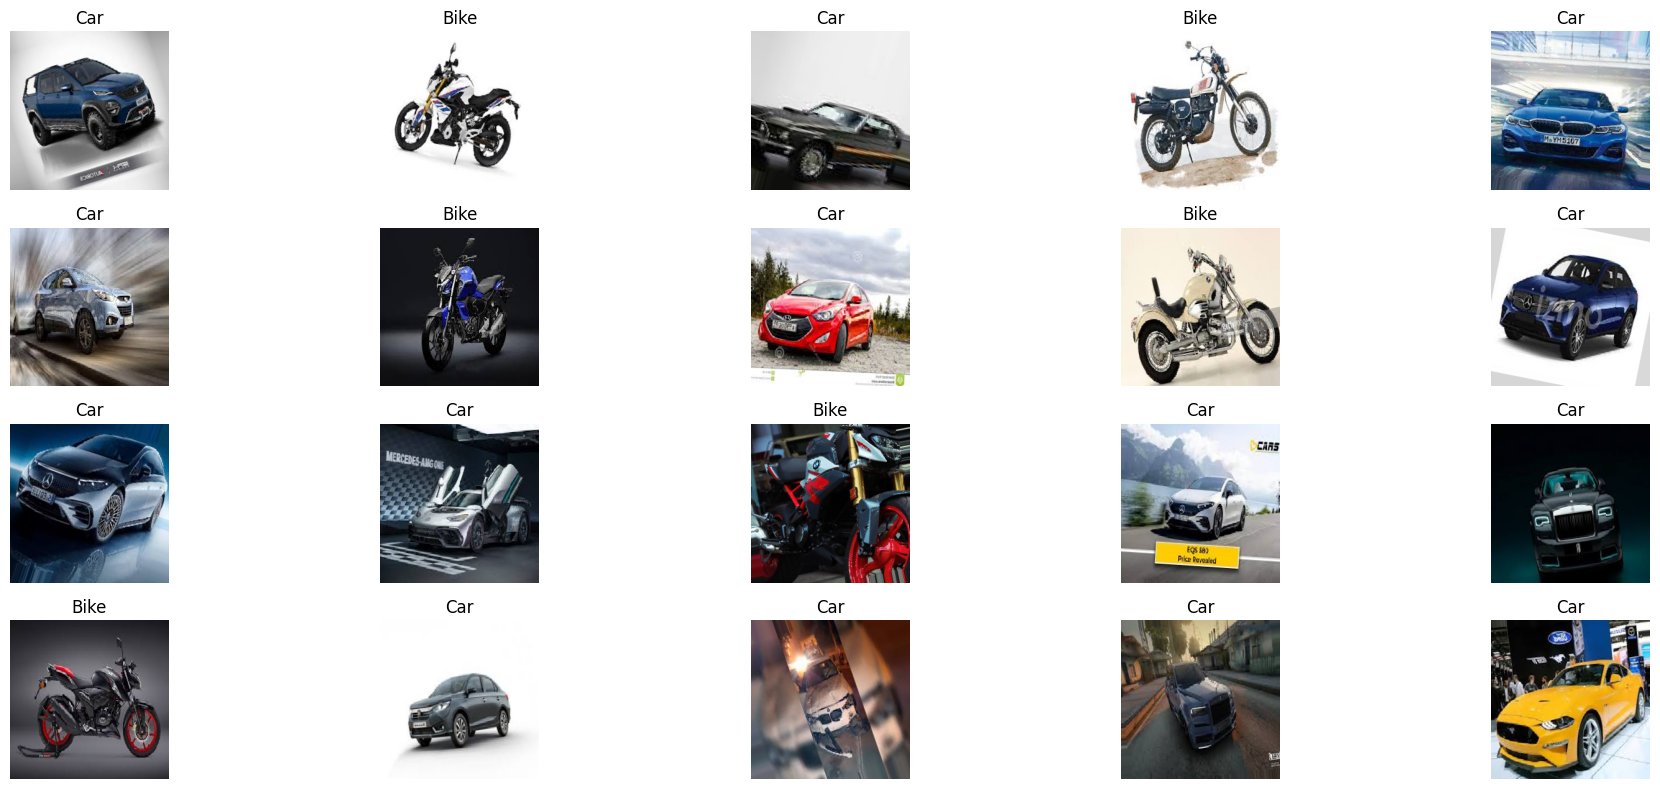

In [9]:
i=1
plt.figure(figsize=(20,8))
for images, labels in train_ds:
    index = np.random.randint(len(images))
    image, label = images[index], labels[index]

    plt.subplot(4,5, i)
    show_image(image, title=f"{class_name[int(label)]}")
    i+=1
    if i>=21: break

plt.tight_layout()
plt.show()


In [10]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Flatten())    

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(train_ds,epochs=16,validation_data=validation_ds)

Epoch 1/16
  8/100 [=>............................] - ETA: 4:15 - loss: 3.1692 - accuracy: 0.6445

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 310s 3s/step - loss: 1.3832 - accuracy: 0.7613 - val_loss: 1.8180 - val_accuracy: 0.5000
Epoch 2/16
100/100 [==============================] - 275s 3s/step - loss: 0.5184 - accuracy: 0.8587 - val_loss: 1.6273 - val_accuracy: 0.5000
Epoch 3/16
100/100 [==============================] - 299s 3s/step - loss: 0.2876 - accuracy: 0.8981 - val_loss: 0.7535 - val_accuracy: 0.6525
Epoch 4/16
100/100 [==============================] - 337s 3s/step - loss: 0.2829 - accuracy: 0.8975 - val_loss: 0.6285 - val_accuracy: 0.6913
Epoch 5/16
100/100 [==============================] - 296s 3s/step - loss: 0.2100 - accuracy: 0.9209 - val_loss: 0.3824 - val_accuracy: 0.8475
Epoch 6/16
100/100 [==============================] - 272s 3s/step - loss: 0.1766 - accuracy: 0.9291 - val_loss: 0.2499 - val_accuracy: 0.8938
Epoch 7/16
100/100 [==============================] - 269s 3s/step - loss: 0.1521 - accuracy: 0.9366 - val_loss: 0.3204 - val_accuracy: 0.8888
Epoch 8/16